In [1]:
import warnings
from tensorflow import keras 

# GPU 사용 설정
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '1'

warnings.filterwarnings('ignore')

In [2]:
from PIL import Image
import numpy as np

### chair의 이미지 해상도 통일하여 적용하기 Test

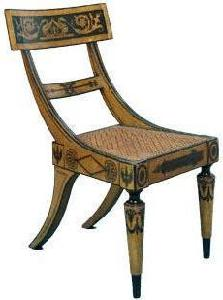

In [3]:
# Image 불러오기
img = Image.open("../Data/cnn/chair/image_0001.jpg")
img

In [4]:
# 배열 확인(세로, 가로, RGB)
np.array(img).shape

(300, 223, 3)

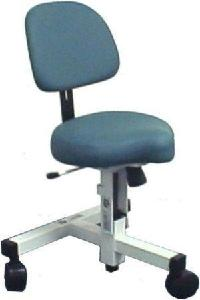

In [5]:
# Image 불러오기
img = Image.open("../Data/cnn/chair/image_0002.jpg")
img

In [6]:
# 배열 확인
np.array(img).shape

(300, 200, 3)

In [7]:
# 너비 해상도 구하기
# 배열 확인 튜플이니까 이렇게 골라오자.
np.array(img).shape[1]

200

---
### chair 전체 이미지의 해상도 평균 구하기

- 파일을 다 가져와서 이미지 사이즈를 다 조절하기.

In [8]:
import glob

In [9]:
widthRatio = []
heightRatio = []

for file in sorted(glob.glob("../Data/cnn/chair/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32) # 파일 가져올때 타입을 정해주는게 좋아
    # print(img.shape[1]) # 잘가져오는지 확인!

    widthRatio.append(img.shape[1])
    heightRatio.append(img.shape[0])

In [10]:
print("chair의 너비 평균 해상도 :", np.max(widthRatio))
print("chair의 높이 평균 해상도 :", np.max(heightRatio))

chair의 너비 평균 해상도 : 300
chair의 높이 평균 해상도 : 300


In [11]:
# 갯수 확인
print(len(widthRatio))
print(len(widthRatio)==len(heightRatio))


62
True


> 너비 : 231, 높이 : 297 로 사용  
- 하지만 아직 컬러 값이니까 gray_r로 바꿔서 사용하자!

---
### chair의 이미지 해상도 변경및 Gray Scale로 적용하기

In [12]:
# Chair의 파일갯수(62개)와 laptop의 파일갯수(81개) 를 60개로 맞추기 
i  = 0 #(이미지 카운트 하다가 60번 넘어가면 스탑, 파일갯수를 카운트함)
for file in sorted(glob.glob("../Data/cnn/chair/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((300, 300), Image.Resampling.LANCZOS) # 이미지 깨짐 방지
    imgResize = imgResize.convert('L') # Grayscale , 만약 투명도가 있는 경우 LA
    imgResize.save("../Data/cnn/chairNew/image_%04d.jpg"%i, 'JPEG')
    i+=1
    if i >= 60:
        break

---
## Laptop의 이미지 해상도 변경및 Grayscale로 적용하기

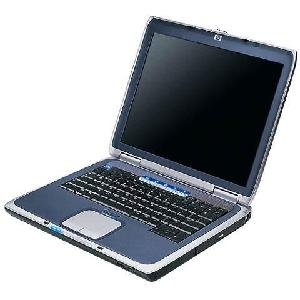

In [13]:
# Image 불러오기
img = Image.open("../Data/cnn/laptop/image_0001.jpg")
img

In [14]:
# Chair의 파일갯수(62개)와 laptop의 파일갯수(81개) 를 60개로 맞추기 
i  = 0 #(이미지 카운트 하다가 60번 넘어가면 스탑, 파일갯수를 카운트함)
for file in sorted(glob.glob("../Data/cnn/laptop/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((300, 300), Image.Resampling.LANCZOS) # 이미지 깨짐 방지
    imgResize = imgResize.convert('L') # Grayscale , 만약 투명도가 있는 경우 LA
    imgResize.save("../Data/cnn/laptopNew/image_%04d.jpg"%i, 'JPEG')
    i+=1
    if i >= 60:
        break

> 이미지 파일 저장하는거 끝났으니 numpy로 바꾸자

---
# chair image를 numpy로 변경하기
- numpy로 사용하려면 아무것도 없는 0 값 데이터들이 먼저 만들어져있어야한다. (자연적 패딩이 되어있대)

In [15]:
number_of_data = 60
img_width_size = 350
img_height_size = 350

- 아무것도 없는 1차원의 검은색 화면을 만들어주자
- 그리고 이미지 차원을 다시 만들어줘야함

In [16]:
chairData = np.zeros(number_of_data * img_width_size * img_height_size, dtype=np.int32).reshape(number_of_data, img_height_size, img_width_size)

In [17]:
chairData.shape

(60, 350, 350)

In [18]:
i = 0

for file in sorted(glob.glob("../Data/cnn/chairNew/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    chairData[i, 25:-25, 25:-25] = img

In [19]:
chairData.shape

(60, 350, 350)

- 잘들어왔는지 확인하기

In [20]:
# 이미지 확인하기
import matplotlib.pyplot as plt


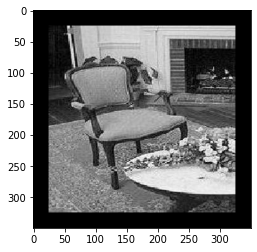

In [21]:

plt.imshow(chairData[0].reshape(350, 350), cmap='gray')
plt.show()

---
## laptop image를 numpy로 변경하기

In [22]:
laptopData = np.zeros(number_of_data * img_width_size * img_height_size, dtype=np.int32).reshape(number_of_data, img_height_size, img_width_size)

In [23]:
laptopData.shape

(60, 350, 350)

In [24]:
i = 0

for file in sorted(glob.glob("../Data/cnn/laptopNew/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    laptopData[i, 25:-25, 25:-25] = img
    i+=1

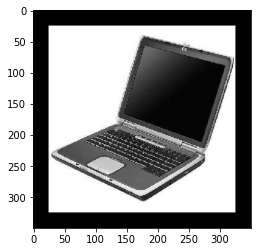

In [25]:
# 이미지 확인하기

plt.imshow(laptopData[0].reshape(350, 350), cmap='gray')
plt.show()

In [26]:
# plt.imshow(laptopData[56].reshape(300, 300), cmap='gray')
# plt.show()

- chairData 와 laptopData를 합치고 정답 만들기를 해야함

---
## numpy data를 train data로 합치기

In [27]:
train = np.concatenate([chairData, laptopData])
train.shape

(120, 350, 350)

### target data 만들기


In [28]:
target = np.concatenate([np.zeros(60), np.ones(60)])
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [29]:
train_scaled = train.reshape(-1, 350, 350) / 255.0

In [30]:
from sklearn.model_selection import train_test_split

trainData, testData, trainTargetData, testTargetData = train_test_split(
    train_scaled, target, test_size=0.2, random_state=30
)

In [31]:
trainData, valData, trainTargetData, valTargetData = train_test_split(
    trainData, trainTargetData, test_size=0.2, random_state=30
)

In [32]:
print(trainData.shape)
print(valData.shape)
print(trainTargetData.shape)
print(valTargetData.shape)

(76, 350, 350)
(20, 350, 350)
(76,)
(20,)


In [33]:
# CNN 만들기
model = keras.Sequential()
model.add(keras.layers.Conv2D(
        32,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same',
        input_shape = (350, 350, 1)
    
))

In [34]:
model.add(keras.layers.MaxPool2D(2))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 350, 350, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 175, 175, 32)     0         
 )                                                               
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.add(keras.layers.Conv2D(
        64,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same',
    
))

In [37]:
model.add(keras.layers.MaxPool2D(2))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 350, 350, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 175, 175, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 175, 175, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 87, 87, 64)       0         
 2D)                                                             
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [39]:
# model.add(keras.layers.Conv2D(
#         128,
#         kernel_size = 3,
#         activation = 'relu',
#         padding = 'same',
    
# ))

In [40]:
# model.add(keras.layers.MaxPool2D(2))

In [41]:
# model.summary()

In [42]:
# 딥러닝 모델 만들기
model.add(keras.layers.Flatten()) # 1차원으로 쫙바뀌고
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.6))
model.add(keras.layers.Dense(2, activation='sigmoid')) # 마지막 레이어 => 출력층

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 350, 350, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 175, 175, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 175, 175, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 87, 87, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 484416)            0         
                                                                 
 dense (Dense)               (None, 100)               4

In [44]:
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/cnn/best-chair-cnn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
            trainData, 
            trainTargetData,
            epochs=50, 
            validation_data=(valData, valTargetData),
            callbacks=[checkpoint_cb, early_stopping_cb]
        )

Epoch 1/50


2022-07-21 19:30:19.226181: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3/3 [==============================] - 3s 1s/step - loss: 0.6205 - accuracy: 0.6711 - val_loss: 0.4443 - val_accuracy: 1.0000
Epoch 2/50
3/3 [==============================] - 3s 942ms/step - loss: 0.3277 - accuracy: 1.0000 - val_loss: 0.3324 - val_accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 3s 870ms/step - loss: 0.2361 - accuracy: 1.0000 - val_loss: 0.1087 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 3s 934ms/step - loss: 0.0999 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 3s 966ms/step - loss: 0.0499 - accuracy: 1.0000 - val_loss: 2.4496e-04 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 3s 928ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 3.6418e-06 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 3s 1s/step - loss: 0.0545 - accuracy: 1.0000 - val_loss: 7.7486e-08 - val_accuracy: 1.0000
Epoch 8/50
3/3 [=========

In [45]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

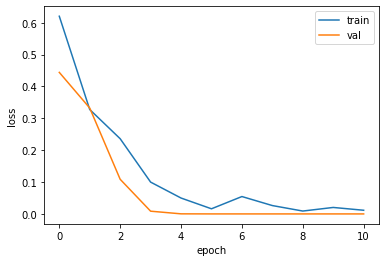

In [46]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

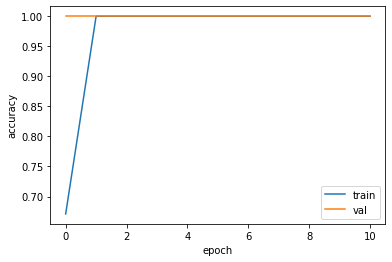

In [47]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [48]:
model.evaluate(valData, valTargetData)

1/1 [==============================] - 0s 152ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [49]:
# valData[0:1]

In [50]:
pred = model.predict(valData[0:1])
print(pred)

1/1 [==============================] - 0s 70ms/step
[[3.9987903e-34 1.0000000e+00]]


In [51]:
model.evaluate(testData, testTargetData)

1/1 [==============================] - 0s 174ms/step - loss: 9.6825 - accuracy: 0.9583


[9.682450294494629, 0.9583333134651184]

---
# test

In [57]:
for file in sorted(glob.glob("../Data/cnn/test/*.jpeg")):
    img = Image.open(file)
    imgResize = img.resize((300, 300), Image.Resampling.LANCZOS) # 이미지 깨짐 방지
    imgResize = imgResize.convert('L') # Grayscale , 만약 투명도가 있는 경우 LA
    imgResize.save("../Data/cnn/testNew/image_%04d.jpg"%i, 'JPEG')
    i+=1


In [58]:
number_of_data = 2
img_width_size = 350
img_height_size = 350

In [59]:
testData = np.zeros(number_of_data * img_width_size * img_height_size, dtype=np.int32).reshape(number_of_data, img_height_size, img_width_size)

In [60]:
i = 0

for file in sorted(glob.glob("../Data/cnn/testNew/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    testData[i, 25:-25, 25:-25] = img
    i+=1

In [62]:
testData = testData.reshape(-1, 350, 350) / 255.0

In [63]:
model.predict(testData[1:2])

1/1 [==============================] - 0s 26ms/step


array([[0., 1.]], dtype=float32)

---
## piano 추가

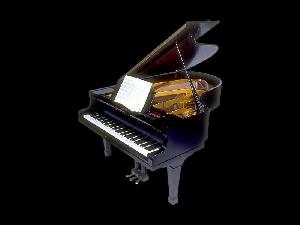

In [64]:
img = Image.open("../Data/cnn/piano/image_0001.jpg")
img

In [65]:
widthRatio = []
heightRatio = []

for file in sorted(glob.glob("../Data/cnn/piano/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32) # 파일 가져올때 타입을 정해주는게 좋아
    # print(img.shape[1]) # 잘가져오는지 확인!
    widthRatio.append(img.shape[1])
    heightRatio.append(img.shape[0])

In [66]:
print("piano 너비 평균 해상도 :", np.max(widthRatio))
print("piano 높이 평균 해상도 :", np.max(heightRatio))

piano 너비 평균 해상도 : 300
piano 높이 평균 해상도 : 300


In [67]:
len(widthRatio)==len(heightRatio)

True

In [68]:
# piano 를 60개로 맞추기 
i  = 0 #(이미지 카운트 하다가 60번 넘어가면 스탑, 파일갯수를 카운트함)
for file in sorted(glob.glob("../Data/cnn/piano/*.jpg")):
    img = Image.open(file)
    # print(img)
    imgResize = img.resize((300, 300), Image.Resampling.LANCZOS) # 이미지 깨짐 방지
    imgResize = imgResize.convert('L') # Grayscale , 만약 투명도가 있는 경우 LA
    imgResize.save("../Data/cnn/pianoNew/image_%04d.jpg"%i, 'JPEG')
    i+=1
    # if i >= 60:
    #     break

In [69]:
number_of_data = 60
img_width_size = 350
img_height_size = 350

In [70]:
pianoData = np.zeros(number_of_data * img_width_size * img_height_size, dtype=np.int32).reshape(number_of_data, img_height_size, img_width_size)

In [71]:
pianoData.shape

(60, 350, 350)

In [72]:
i = 0

for file in sorted(glob.glob("../Data/cnn/pianoNew/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    pianoData[i, 25:-25, 25:-25] = img
    i+=1

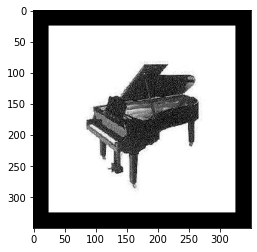

In [73]:
# 이미지 확인하기
plt.imshow(pianoData[3].reshape(350, 350), cmap='gray')
plt.show()

In [74]:
train = np.concatenate([chairData, laptopData, pianoData])
train.shape

(180, 350, 350)

In [75]:
target = np.concatenate([np.zeros(60), np.ones(60),np.full(60,2)])
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [76]:
train_scaled = train.reshape(-1, 350, 350) / 255.0

In [77]:
trainData, testData, trainTargetData, testTargetData = train_test_split(
    train_scaled, target, test_size=0.2, random_state=30
)

In [78]:
trainData, valData, trainTargetData, valTargetData = train_test_split(
    trainData, trainTargetData, test_size=0.2, random_state=30
)
print(trainData.shape)
print(valData.shape)
print(trainTargetData.shape)
print(valTargetData.shape)

(115, 350, 350)
(29, 350, 350)
(115,)
(29,)


In [79]:
# CNN 만들기
model = keras.Sequential()
model.add(keras.layers.Conv2D(
        32,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same',
        input_shape = (350, 350, 1)
    
))

In [80]:
model.add(keras.layers.MaxPool2D(2))

In [81]:
model.add(keras.layers.Conv2D(
        64,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same',
    
))

In [82]:
model.add(keras.layers.MaxPool2D(2))

In [83]:
# 딥러닝 모델 만들기
model.add(keras.layers.Flatten()) # 1차원으로 쫙바뀌고
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Dense(3, activation='softmax')) # 마지막 레이어 => 출력층

In [84]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 350, 350, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 175, 175, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 175, 175, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 87, 87, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 484416)            0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [85]:
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/cnn/best-chair-cnn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
            trainData, 
            trainTargetData,
            epochs=50, 
            validation_data=(valData, valTargetData),
            callbacks=[checkpoint_cb, early_stopping_cb]
        )

Epoch 1/50
4/4 [==============================] - 4s 948ms/step - loss: 7.0991 - accuracy: 0.3652 - val_loss: 1.6985 - val_accuracy: 0.7586
Epoch 2/50
4/4 [==============================] - 4s 912ms/step - loss: 1.4655 - accuracy: 0.6957 - val_loss: 0.6938 - val_accuracy: 0.6207
Epoch 3/50
4/4 [==============================] - 4s 919ms/step - loss: 0.7556 - accuracy: 0.7130 - val_loss: 0.6310 - val_accuracy: 0.8621
Epoch 4/50
4/4 [==============================] - 4s 918ms/step - loss: 0.7088 - accuracy: 0.6957 - val_loss: 0.5275 - val_accuracy: 0.8621
Epoch 5/50
4/4 [==============================] - 4s 894ms/step - loss: 0.6032 - accuracy: 0.7739 - val_loss: 0.4413 - val_accuracy: 0.8621
Epoch 6/50
4/4 [==============================] - 4s 913ms/step - loss: 0.4668 - accuracy: 0.7739 - val_loss: 0.3467 - val_accuracy: 0.8966
Epoch 7/50
4/4 [==============================] - 4s 894ms/step - loss: 0.3554 - accuracy: 0.8696 - val_loss: 0.2927 - val_accuracy: 0.8966
Epoch 8/50
4/4 [====

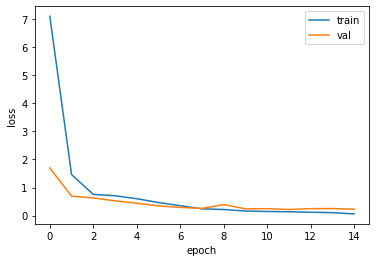

In [86]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

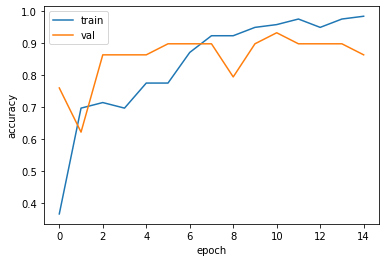

In [87]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [88]:
model.evaluate(valData, valTargetData)

1/1 [==============================] - 0s 215ms/step - loss: 0.2188 - accuracy: 0.8966


[0.21878428757190704, 0.8965517282485962]

In [89]:
pred = model.predict(valData[0:1])
print(pred)

1/1 [==============================] - 0s 47ms/step
[[5.9669546e-06 8.4211580e-02 9.1578251e-01]]


In [90]:
model.predict(testData[1:2])

1/1 [==============================] - 0s 22ms/step


array([[9.9917102e-01, 4.6238175e-04, 3.6663600e-04]], dtype=float32)

In [91]:
model.predict(testData[0:1])

1/1 [==============================] - 0s 23ms/step


array([[1.7908873e-06, 9.3450934e-01, 6.5488897e-02]], dtype=float32)